In [1]:
'''
Librosa is a popular Python library designed for music and audio analysis. 
It is used to analyze audio signals,create Music Information Retrieval (MIR) systems, and 
process sound for machine learning applications
'''
import librosa 
import numpy as np
import matplotlib.pyplot as plt

Audio loaded!
Duration: 23.59 seconds
Sample rate: 16000


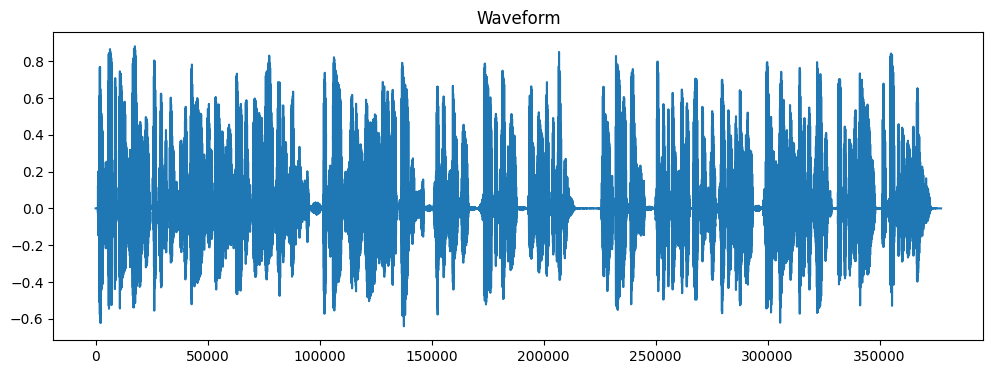

In [2]:
# Load the sample audio (change path to where you saved it)
audio_path = r"D:\REHAAN\1. Ml Projects\5. AI Voice Detection\data\ai\ai_sample_1.mp3"

# Load audio
y, sr = librosa.load(audio_path, sr=16000)
# y: audio signal (amplitude values)
# sr: sample rate (16 kHz, standard for speech models)

print(f"Audio loaded!")
print(f"Duration: {len(y)/sr:.2f} seconds")
print(f"Sample rate: {sr}")

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(y)
plt.title("Waveform")
plt.show()

**Feature Extraction**

In [3]:
def extract_features(audio_path):
    """Extract audio features for AI vs Human detection"""
    
    # Load audio
    y, sr = librosa.load(audio_path, sr=16000)
    
    # 1. MFCCs (most important for voice detection)
    '''
    MFCCs (Mel-Frequency Cepstral Coefficients) are essential features for audio processing, 
    especially speech recognition, representing the short-term power spectrum of sound in a way that
    mimics human hearing. 
    They capture key vocal tract characteristics by applying a Mel scale
    (matching human pitch perception) and Discrete Cosine Transform (DCT) to the audio's frequency
    spectrum, creating a compact, perceptually relevant "fingerprint" for sounds, distinguishing
    words and speakers
    '''
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    
    # 2. Spectral features
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    
    # 3. Zero crossing rate (voice naturalness)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    
    # 4. Chroma features
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    
    # Combine all features into one array
    features = np.concatenate([
        mfccs_mean,
        mfccs_std,
        [spectral_centroid, spectral_rolloff, spectral_contrast, zcr, chroma]
    ])
    
    return features

# Test it on sample audio
features = extract_features(audio_path)
print(f"Extracted {len(features)} features")
print(f"Feature vector: {features[:10]}...")  # Show first 10

Extracted 85 features
Feature vector: [-194.93530273   81.85807037  -11.426898     27.1790638     3.74231482
   -6.82069635  -15.86493683  -10.8915844   -14.36773777   -6.19746208]...


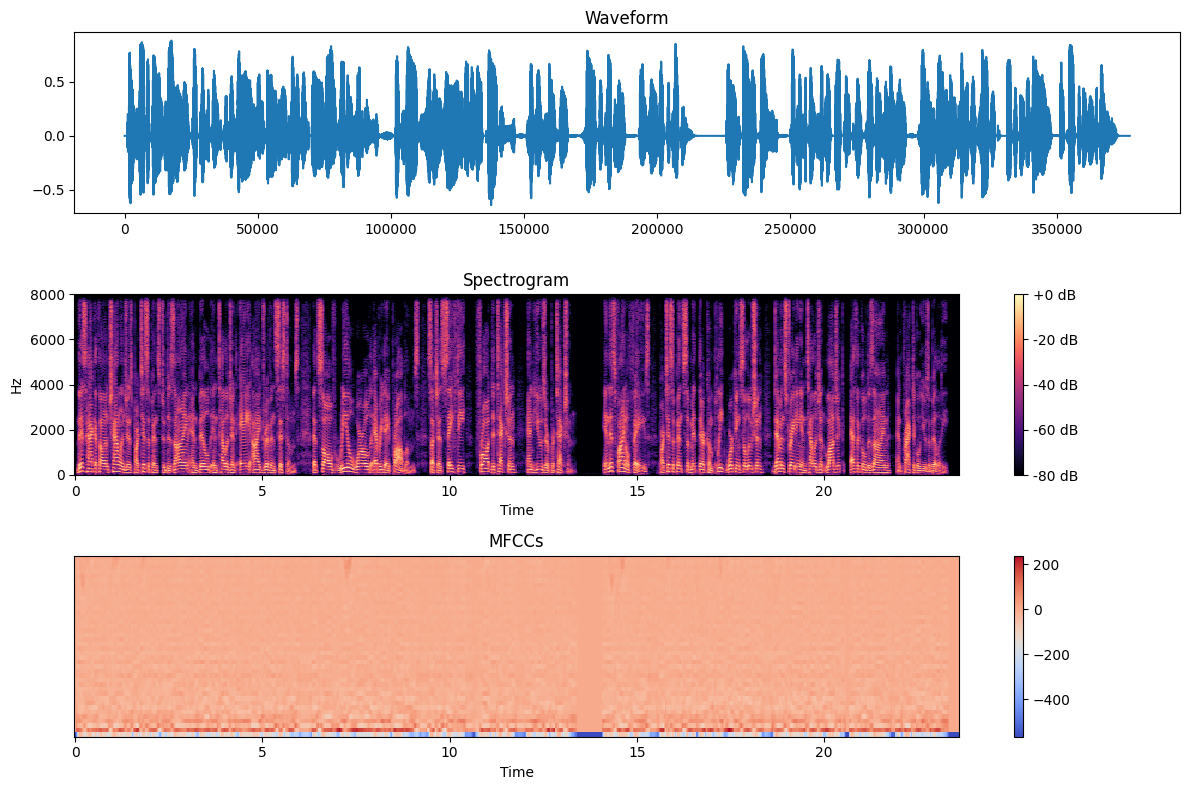

In [4]:
# Create spectrogram
plt.figure(figsize=(12, 8))

# Waveform
plt.subplot(3, 1, 1)
plt.plot(y)
plt.title("Waveform")

# Spectrogram
plt.subplot(3, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")

# MFCCs
plt.subplot(3, 1, 3)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCCs")

plt.tight_layout()
plt.show()

**Load ALL Audio Files and Extract Features**

In [6]:
import os
import pandas as pd

def load_all_audio_features(base_path):
    """Load all audio files and extract features"""
    
    features_list = []
    labels = []
    filenames = []
    languages = []
    
    # Define paths
    ai_path = os.path.join(base_path, 'ai')
    human_path = os.path.join(base_path, 'human')
    
    print("Loading AI voices...")
    # Load AI voices
    for lang_folder in os.listdir(ai_path):
        lang_path = os.path.join(ai_path, lang_folder)
        if os.path.isdir(lang_path):
            for audio_file in os.listdir(lang_path):
                if audio_file.endswith('.mp3'):
                    file_path = os.path.join(lang_path, audio_file)
                    try:
                        features = extract_features(file_path)
                        features_list.append(features)
                        labels.append(1)  # 1 = AI
                        filenames.append(audio_file)
                        languages.append(lang_folder)
                        print(f"✓ {audio_file}")
                    except Exception as e:
                        print(f"✗ Error with {audio_file}: {e}")
    
    print("\nLoading Human voices...")
    # Load Human voices
    for lang_folder in os.listdir(human_path):
        lang_path = os.path.join(human_path, lang_folder)
        if os.path.isdir(lang_path):
            for audio_file in os.listdir(lang_path):
                if audio_file.endswith('.mp3'):
                    file_path = os.path.join(lang_path, audio_file)
                    try:
                        features = extract_features(file_path)
                        features_list.append(features)
                        labels.append(0)  # 0 = Human
                        filenames.append(audio_file)
                        languages.append(lang_folder)
                        print(f"✓ {audio_file}")
                    except Exception as e:
                        print(f"✗ Error with {audio_file}: {e}")
    
    # Create DataFrame
    df = pd.DataFrame(features_list)
    df['label'] = labels
    df['filename'] = filenames
    df['language'] = languages
    
    print(f"\n✅ Total samples loaded: {len(df)}")
    print(f"   AI samples: {sum(labels)}")
    print(f"   Human samples: {len(labels) - sum(labels)}")
    
    return df

# Load all data
base_path = r"D:\REHAAN\1. Ml Projects\5. AI Voice Detection\data"  
df = load_all_audio_features(base_path)

# Show dataset
print("\nDataset shape:", df.shape)
df.head()

Loading AI voices...
✓ AI_english_1.mp3
✓ AI_english_2.mp3
✓ AI_hindi_1.mp3
✓ AI_hindi_2.mp3
✓ AI_malyalam_1.mp3
✓ AI_malyalam_2.mp3
✓ AI_tamil_1.mp3
✓ AI_tamil_2.mp3
✓ AI_telugu_1.mp3
✓ AI_telugu_2.mp3

Loading Human voices...
✓ human_english_1.mp3
✓ human_english_2.mp3
✓ human_hindi_1.mp3
✓ human_hindi_2.mp3
✓ human_malyalam_1.mp3
✓ human_malyalam_2.mp3
✓ human_tamil_1.mp3
✓ human_tamil_2.mp3
✓ human_telugu_1.mp3
✓ human_telugu_2.mp3

✅ Total samples loaded: 20
   AI samples: 10
   Human samples: 10

Dataset shape: (20, 88)


,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,label,filename,language
0,-286.767273,80.672165,1.007132,31.662951,0.288736,-2.583116,-3.818652,-4.195755,-6.840989,-7.937209,...,5.958553,5.340856,1669.721802,3184.135428,21.804772,0.135588,0.392933,1,AI_english_1.mp3,English
1,-246.951813,58.788174,16.213604,3.313540,-8.016596,-10.907730,-7.111948,-18.693146,-8.720415,-18.250006,...,9.056042,8.965530,2206.514671,3968.338300,24.412163,0.217307,0.316800,1,AI_english_2.mp3,English
2,-307.764313,62.525284,-13.871154,2.707670,-19.312563,-16.983950,-12.361227,-26.946138,-14.013948,-13.135609,...,7.929099,6.361130,1789.246227,3179.359946,24.215954,0.148202,0.324885,1,AI_hindi_1.mp3,Hindi
3,-242.691360,86.024406,8.511465,22.174068,10.536111,-7.132363,-2.915605,-0.724845,-18.502945,-6.003565,...,6.245722,5.808025,1503.928030,2902.322338,22.513142,0.117532,0.378210,1,AI_hindi_2.mp3,Hindi
4,-322.409485,114.329727,-10.903693,35.679863,-1.460044,-2.783637,-1.796617,-10.047891,-4.967067,-8.185038,...,6.454339,7.252222,1192.597834,2322.851350,22.216301,0.078597,0.368345,1,AI_malyalam_1.mp3,malyalam


**Train the Model**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Prepare data
X = df.drop(['label', 'filename', 'language'], axis=1)
y = df['label']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Train Random Forest
print("\nTraining model...")
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Human', 'AI']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save model
model_path = r"D:\REHAAN\1. Ml Projects\5. AI Voice Detection\models\voice_detector.pkl"  # UPDATE PATH!
joblib.dump(model, model_path)
print(f"\n Model saved to: {model_path}")

Training samples: 16
Testing samples: 4

Training model...

✅ Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

       Human       1.00      1.00      1.00         2
          AI       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Confusion Matrix:
[[2 0]
 [0 2]]

💾 Model saved to: D:\REHAAN\1. Ml Projects\5. AI Voice Detection\models\voice_detector.pkl


**Test on New Audio**

In [12]:
def predict_voice(audio_path, model):
    """Predict if voice is AI or Human"""
    
    # Extract features
    features = extract_features(audio_path)
    features = features.reshape(1, -1)
    
    # Predict
    prediction = model.predict(features)[0]
    confidence = model.predict_proba(features)[0].max()
    
    label = "AI_GENERATED" if prediction == 1 else "HUMAN"
    
    print(f"Classification: {label}")
    print(f"Confidence: {confidence:.2f}")
    
    return label, confidence

# Test sample
test_audio = r"D:\REHAAN\1. Ml Projects\5. AI Voice Detection\data\human\English\human_english_2.mp3" 
predict_voice(test_audio, model)

Classification: HUMAN
Confidence: 0.85


('HUMAN', 0.85)

In [15]:
test_audio = r"D:\REHAAN\1. Ml Projects\5. AI Voice Detection\data\ai\ai_sample_1.mp3" 
predict_voice(test_audio, model) 
# THIS WAS WRONG, thats dataset limitation

Classification: HUMAN
Confidence: 0.59


('HUMAN', 0.59)

In [17]:
test_audio = r"D:\REHAAN\1. Ml Projects\5. AI Voice Detection\data\ai\ai_sample_1.mp3"
predict_voice(test_audio, model) 

Classification: HUMAN
Confidence: 0.59


('HUMAN', 0.59)